In [2]:
import pandas as pd
import numpy as np


In [3]:
car_price = pd.read_csv('C:\\Users\\hp laptop\\Downloads\\Finalprojects_DS-master\\Car_pricing_prediction\\CarPrice_Assignment.csv')

In [4]:
car_price.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
car_price.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
import matplotlib.pyplot as plt

# LINEAR REGRESSION


In [7]:
from sklearn import linear_model

In [8]:
y = car_price.price

In [9]:
obj_car_price = car_price.select_dtypes(include=['object']).copy()
obj_car_price.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [10]:
obj_car_price[obj_car_price.isnull().any(axis=1)]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem


In [11]:
obj_car_price["cylindernumber"].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [12]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [13]:
car_price.replace(cleanup_nums, inplace=True)
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
car_price.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [15]:
x = car_price[['horsepower','highwaympg','doornumber','cylindernumber', 'peakrpm', 'citympg','enginesize', 'curbweight','wheelbase',
       'carlength', 'carwidth', 'carheight', 'stroke',
       'compressionratio']]

In [16]:
model_sklearn_car_price = linear_model.LinearRegression()

In [17]:
model_sklearn_car_price.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
y_pred = model_sklearn_car_price.predict(x)

In [20]:
y_pred

array([13415.81867858, 13415.81867858, 16217.08529233, 11395.7678117 ,
       15148.87984113, 14738.82505458, 17613.01621969, 17775.59819977,
       17733.18506239, 16700.76906865, 13303.97618021, 13199.26308144,
       15623.34015182, 15599.9180431 , 16173.16582963, 27291.11608532,
       27270.83396591, 29875.30132816,  -307.03803917,  6096.39460762,
        5729.45851207,  5375.82600735,  6437.32750037,  8274.27989054,
        6426.03351669,  6458.54991271,  6458.54991271,  8326.3145016 ,
       11907.04653754, 15618.15864236,  2540.55889819,  8234.65167536,
        5458.54156157,  8530.55648027,  8554.20476828,  7766.0692909 ,
        9190.95319946, 10518.63479329, 10596.96974733,  9823.49602712,
        8347.86357779, 10380.25251175, 10224.08520841,  6346.23423599,
        6096.39460762,  6043.41213888, 10806.15173943, 31485.58502234,
       31485.58502234, 44725.15080259,  5011.46780182,  6069.74327548,
        6077.13336549,  5197.93997763,  5205.33006763,  8926.9713712 ,
      

In [21]:
predicted = pd.DataFrame(y_pred)

In [22]:
predicted

,0
0,13415.818679
1,13415.818679
2,16217.085292
3,11395.767812
4,15148.879841
5,14738.825055
6,17613.016220
7,17775.598200
8,17733.185062
9,16700.769069


In [93]:
car_price['predicted'] = predicted

In [94]:
car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,predicted
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,13415.818679
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,13415.818679
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,16217.085292
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,11395.767812
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,15148.879841
5,6,2,audi fox,gas,std,2,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,14738.825055
6,7,1,audi 100ls,gas,std,4,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,17613.016220
7,8,1,audi 5000,gas,std,4,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,17775.598200
8,9,1,audi 4000,gas,turbo,4,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,17733.185062
9,10,0,audi 5000s (diesel),gas,turbo,2,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,16700.769069


In [95]:
final_model = car_price[['price', 'predicted']].head(25)

In [96]:
final_model

,price,predicted
0,13495.000,13415.818679
1,16500.000,13415.818679
2,16500.000,16217.085292
3,13950.000,11395.767812
4,17450.000,15148.879841
5,15250.000,14738.825055
6,17710.000,17613.016220
7,18920.000,17775.598200
8,23875.000,17733.185062
9,17859.167,16700.769069


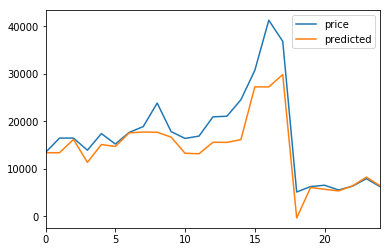

In [97]:
final_model.plot()

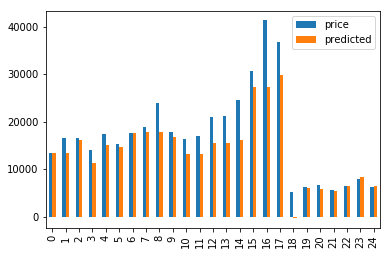

In [98]:
final_model.plot.bar()

In [99]:
model_sklearn_car_price.score(x,y)

0.852506700115713

# LOGISTIC REGRESSION

In [100]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state =0)
regressor.fit(x, y)

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'